In [3]:
import os
import cv2

In [2]:
features=[]
target=[]
for x in ["with_mask","without_mask"]:
    ImageNameList=os.listdir("D:/Datasets/FaceMask/data" + "/" + x)
    for y in ImageNameList:
        Imgarr=cv2.imread("D:\Datasets\FaceMask\data" + "/" + x + "/" + y)
        try:
            Imgarr=cv2.resize(Imgarr,(32,32))
        except:
            pass
        else:
            features.append(Imgarr)
            if x=="with_mask":
                target.append(1)
            else:
                target.append(0)
    print("In Folder",x)

In Folder with_mask
In Folder without_mask


In [3]:
import numpy as np
features=np.array(features)
target=np.array(target)

In [4]:
features.shape

(7553, 32, 32, 3)

In [5]:
target.shape

(7553,)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2)

In [8]:
features_train.shape

(6042, 32, 32, 3)

In [9]:
features_test.shape

(1511, 32, 32, 3)

In [10]:
target_train.shape

(6042,)

In [11]:
target_test.shape

(1511,)

In [4]:
def preprocessing(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=image/255
    return image

In [13]:
features_train=np.array(list(map(preprocessing,features_train)))

In [14]:
features_train.shape

(6042, 32, 32)

In [15]:
features_train=features_train.reshape(6042,32,32,1)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.2)

In [18]:
dataGen.fit(features_train)

In [19]:
batches=dataGen.flow(features_train,target_train,batch_size=10)

In [20]:
len(batches)

605

In [21]:
images,labels=next(batches)

In [22]:
images.shape

(10, 32, 32, 1)

In [23]:
images=images.reshape(10,32,32)

In [24]:
import matplotlib.pyplot as plt

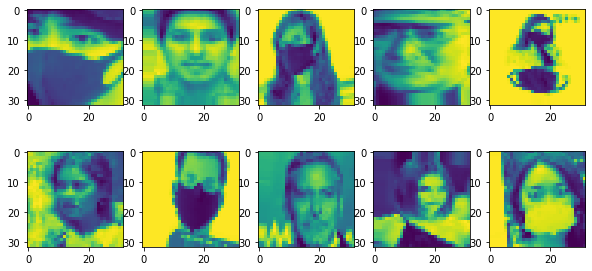

In [25]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(4,5,i+1)
    plt.imshow(images[i])
plt.show()

In [26]:
from tensorflow.keras.utils import to_categorical
target_train=to_categorical(target_train)
target_train.shape

(6042, 2)

In [27]:
features_train.shape

(6042, 32, 32, 1)

In [28]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential

In [29]:
model=Sequential()
model.add(Conv2D(60,(3,3),activation="relu",input_shape=(32,32,1)))
model.add(Conv2D(60,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))

In [30]:
from tensorflow.keras.optimizers import Adam

In [31]:
model.compile(Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [32]:
model.fit_generator(dataGen.flow(features_train,target_train,batch_size=10),epochs=30)

C:\Users\Subham\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
605/605 [==============================] - 22s 34ms/step - loss: 0.6310 - accuracy: 0.6245
Epoch 2/30
605/605 [==============================] - 21s 34ms/step - loss: 0.4862 - accuracy: 0.7686
Epoch 3/30
605/605 [==============================] - 21s 34ms/step - loss: 0.4410 - accuracy: 0.7951
Epoch 4/30
605/605 [==============================] - 21s 34ms/step - loss: 0.4022 - accuracy: 0.8216
Epoch 5/30
605/605 [==============================] - 21s 35ms/step - loss: 0.3840 - accuracy: 0.8312
Epoch 6/30
605/605 [==============================] - 21s 34ms/step - loss: 0.3605 - accuracy: 0.8383
Epoch 7/30
605/605 [==============================] - 21s 34ms/step - loss: 0.3493 - accuracy: 0.8444
Epoch 8/30
605/605 [==============================] - 21s 34ms/step - loss: 0.3178 - accuracy: 0.8613
Epoch 9/30
605/605 [==============================] - 21s 35ms/step - loss: 0.3117 - accuracy: 0.8724
Epoch 10/30
605/605 [==============================] - 21s 35ms/step - loss: 0.307

In [33]:
ModelToJSON=model.to_json()

In [34]:
obj=open("D:/Datasets/FaceMaskModel.json","w")
obj.write(ModelToJSON)
obj.close()

In [35]:
model.save_weights("D:/Datasets/FaceMaskWeights.h5")

In [5]:
from tensorflow.keras.models import model_from_json
abc=open("D:/Datasets/FaceMaskModel.json","r")
loaded_data=abc.read()
model=model_from_json(loaded_data)
model.load_weights("D:/Datasets/FaceMaskWeights.h5")

In [6]:
capt=cv2.VideoCapture(0)
capt.set(3,640)
capt.set(4,480)
capt.set(10,180)

False

In [7]:
import numpy as np
def getClassName(classNo):
    if classNo==1:return 'With Mask'
    else:return 'Without Mask'

In [ ]:
while True:
    message,image=capt.read()
    if not message:
        break
    imagearr=np.asarray(image)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face=facecasc.detectMultiScale(gray,1.25,3)
    for (x,y,w,h) in face:
        croppedFace=imagearr[x:x+w,y:y+h]
        try:
            imagearr=cv2.resize(imagearr,(32,32))
        except:
            pass
        else:
            cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),3)
            imagearr=preprocessing(imagearr)
            imagearr=imagearr.reshape(1,32,32,1)
            predictions=model.predict(imagearr)
            NeuronIndex=model.predict_classes(imagearr)
            cv2.putText(image,"Class: ",(20,35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
            cv2.putText(image,"Probability: ",(20,75),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
            probabilityValue=np.amax(predictions)
            if probabilityValue>=0.6:
                cv2.putText(image,getClassName(NeuronIndex),(120,35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
                cv2.putText(image,str(int(probabilityValue*100))+"%",(200,75),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
            cv2.imshow("Model Prediction",image)
            AsciiValue=cv2.waitKey(1)
            if AsciiValue==ord('s'):
                cv2.destroyAllWindows()
                break

In [8]:
while True:
    message,image=capt.read()
    imagearr=np.asarray(image)
    try:
        imagearr=cv2.resize(imagearr,(32,32))
    except:
        pass
    else:
        imagearr=preprocessing(imagearr)
        imagearr=imagearr.reshape(1,32,32,1)
        predictions=model.predict(imagearr)
        NeuronIndex=model.predict_classes(imagearr)
        cv2.putText(image,"Class: ",(20,35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
        cv2.putText(image,"Probability: ",(20,75),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
        probabilityValue=np.amax(predictions)
        if probabilityValue>=0.6:
            cv2.putText(image,getClassName(NeuronIndex),(120,35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
            cv2.putText(image,str(int(probabilityValue*100))+"%",(200,75),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
        cv2.imshow("Model Prediction",image)
        AsciiValue=cv2.waitKey(1)
        if AsciiValue==ord('s'):
            cv2.destroyAllWindows()
            break

In [2]:
import cv2
cap=cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
while True:
    message,image=cap.read()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face=face_cascade.detectMultiScale(gray,1.25,3)
    for (x,y,w,h) in face:
        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),3)
    cv2.imshow('Faces',image)
    AsciiValue=cv2.waitKey(1)
    if AsciiValue==ord('s'):
        cv2.destroyAllWindows()
        break

In [1]:
import cv2

# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# To capture video from webcam. 
cap = cv2.VideoCapture(0)
# To use a video file as input 
# cap = cv2.VideoCapture('filename.mp4')

while True:
    # Read the frame
    _, img = cap.read()
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    # Display
    cv2.imshow('img', img)
    # Stop if escape key is pressed
    k = cv2.waitKey(30) & 0xff
    if k==27:
        break
# Release the VideoCapture object
cap.release()

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


In [ ]:
["happy","sad","angry","disgusted","fearful","neutral","surprised"]